2

## Enviorments 

In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
api_key_groq = os.getenv('GROQ_API_KEY')

## LLM

In [2]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name="llama-3.1-8b-instant", api_key=api_key_groq)
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x00000189CF389640>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000189CF528800>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

## TOOL

In [3]:
def add(a, b):
    """Add a and b
    Args:
        a (int): first int
        b (int): second int

    Returns:
        int
    """
    return a + b
    

## Building Tool with LLM

In [12]:
llm_with_tools = llm.bind_tools([add])

## Using messages as state

In [5]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing import Annotated
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

## Chatbot node functionality

In [6]:
def llm_tool(state: State):
    # Create llm_with_tools inside the function to avoid scope issues
    llm_with_tools_local = llm.bind_tools([add])
    return {"messages": [llm_with_tools_local.invoke(state["messages"])]}

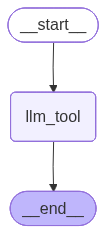

In [7]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
builder= StateGraph(State)
builder.add_node("llm_tool",llm_tool)
builder.add_edge(START,"llm_tool")
builder.add_edge("llm_tool",END)
graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
from langchain_core.messages import HumanMessage

# Convert string to proper message format
messages = graph.invoke({"messages": [HumanMessage(content="What is 2 plus 2")]})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (wjrmkdte3)
 Call ID: wjrmkdte3
  Args:
    a: 2
    b: 2


In [9]:
tools = [add]

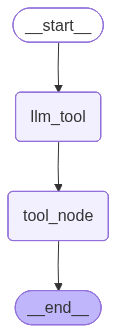

In [10]:
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
builder= StateGraph(State)
builder.add_node("llm_tool",llm_tool)
builder.add_node("tool_node",ToolNode(tools))
builder.add_edge(START,"llm_tool")
builder.add_edge("llm_tool","tool_node")
builder.add_edge("llm_tool",END)
graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
from langchain_core.messages import HumanMessage

# Convert string to proper message format
messages = graph.invoke({"messages": [HumanMessage(content="What is 2 plus 2")]})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (vk4x22hqe)
 Call ID: vk4x22hqe
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: add

4
